In [12]:
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

%matplotlib inline

In [13]:
# 데이터 불러오기
df = pd.read_csv("Tayko.csv")

# 범주형 변수들에 대한 통계량 계산하기
cat_cols = ['US', 'Web order', 'Gender=male', 'Address_is_res']
for col in cat_cols:
    result = df.groupby(col)['Spending'].agg(['mean', 'std'])
    print(result)

          mean         std
US                        
0   101.216524  174.844401
1   102.924803  189.275664
                 mean         std
Web order                        
0           82.902439  173.417088
1          129.199531  200.463840
                   mean        std
Gender=male                       
0            107.339642  190.83233
1             98.350810  183.02006
                      mean         std
Address_is_res                        
0               105.306162  199.521159
1                93.174208  132.204281


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

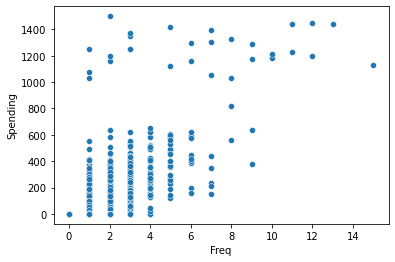

In [17]:
sns.scatterplot(x="Freq", y="Spending", data=df)
plt.show()

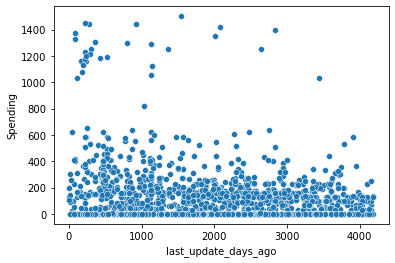

In [18]:
sns.scatterplot(x="last_update_days_ago", y="Spending", data=df)
plt.show()

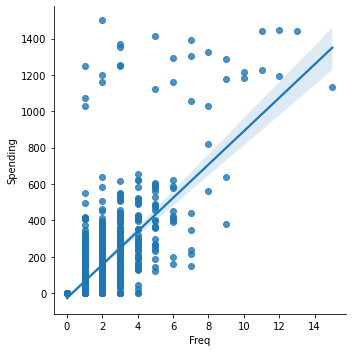

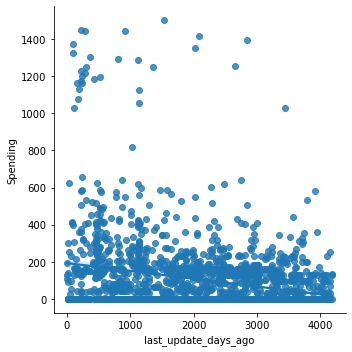

In [19]:
sns.lmplot(x="Freq", y="Spending", data=df)
plt.show()

sns.lmplot(x="last_update_days_ago", y="Spending", data=df)
plt.show()

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 더미 데이터 생성
data = pd.read_csv("Tayko.csv")

# 학습 데이터와 검증 데이터로 분할
train, test = train_test_split(data, test_size=0.3, random_state=42)

# 다중 선형회귀 모델 생성
X_train = train.drop(['Spending'], axis=1)
y_train = train['Spending']
model = LinearRegression()
model.fit(X_train, y_train)

# 회귀계수 출력
coef = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficients'])
print(coef)

# 예측값과 예측오차 계산
X_test = test.drop(['Spending'], axis=1)
y_test = test['Spending']
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.2f}")

# 예측변수 후진제거
from sklearn.feature_selection import RFE

selector = RFE(model, n_features_to_select=4, step=1)
selector = selector.fit(X_train, y_train)
print(selector.support_)
print(X_train.columns[selector.support_])

# 검증 데이터에서 첫 번째 데이터를 추출
val_X_first = X_test.iloc[[0]]
val_y_first = y_test.iloc[[0]]

# 모델로부터 예측값 계산
pred_y_first = model.predict(val_X_first)

# 예측 오차 계산
error_first = val_y_first - pred_y_first

print("Predicted Spending:", pred_y_first[0])
print("Actual Spending:", val_y_first.iloc[0])
print("Error:", error_first.iloc[0])


# 검증 데이터에 대한 모델의 성능 평가
val_pred_y = model.predict(X_test)
val_mse = mean_squared_error(y_test, val_pred_y)
val_r2 = r2_score(val_y, val_pred_y)

print("Validation MSE:", val_mse)
print("Validation R2:", val_r2)

# 모델 잔차 계산
residuals = val_y - val_pred_y

# 잔차에 대한 히스토그램 생성
sns.histplot(residuals, kde=True)

# 정규분포를 따르는지 확인
print("Residuals are normally distributed:", stats.normaltest(residuals)[1] > 0.05)


                      Coefficients
sequence_number          -0.001714
US                       -1.424146
source_a                  5.080632
source_c                -56.032005
source_b                -18.525952
source_d                -51.938934
source_e                -24.157434
source_m                -43.594227
source_o                  8.169034
source_h                -81.291367
source_r                 11.606138
source_s                -29.568165
source_t                -30.462541
source_u                 -8.154856
source_p                -69.092917
source_x                -21.777204
source_w                -11.216424
Freq                     76.637953
last_update_days_ago     -0.017020
1st_update_days_ago       0.009311
Web order                -1.694370
Gender=male              -1.473613
Address_is_res          -65.610658
Purchase                 86.146209
Mean squared error: 14829.94
[False False False False False False False False False  True False False
 False False  True Fals

NameError: name 'r2_score' is not defined

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 더미 데이터 생성
data = pd.read_csv("Tayko.csv")

# 학습 데이터와 검증 데이터로 분할
train, test = train_test_split(data, test_size=0.3, random_state=42)

# 다중 선형회귀 모델 생성
X_train = train.drop(['Spending'], axis=1)
y_train = train['Spending']
model = LinearRegression()
model.fit(X_train, y_train)

# 회귀계수 출력
coef = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficients'])
print(coef)

# 예측값과 예측오차 계산
X_test = test.drop(['Spending'], axis=1)
y_test = test['Spending']
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.2f}")

# 예측변수 후진제거
from sklearn.feature_selection import RFE

selector = RFE(model, n_features_to_select=4, step=1)
selector = selector.fit(X_train, y_train)
print(selector.support_)
print(X_train.columns[selector.support_])

# 검증 데이터에서 첫 번째 데이터를 추출
val_X_first = X_test.iloc[[0]]
val_y_first = y_test.iloc[[0]]

# 모델로부터 예측값 계산
pred_y_first = model.predict(val_X_first)

# 예측 오차 계산
error_first = val_y_first - pred_y_first

print("Predicted Spending:", pred_y_first[0])
print("Actual Spending:", val_y_first.iloc[0])
print("Error:", error_first.iloc[0])


# 검증 데이터에 대한 모델의 성능 평가
val_pred_y = model.predict(X_test)
val_mse = mean_squared_error(y_test, val_pred_y)
val_r2 = r2_score(y_test, val_pred_y)

print("Validation MSE:", val_mse)
print("Validation R2:", val_r2)

# 모델 잔차 계산
residuals = val_y_first - val_pred_y

# 잔차에 대한 히스토그램 생성
sns.histplot(residuals, kde=True)

# 정규분포를 따르는지 확인
print("Residuals are normally distributed:", stats.normaltest(residuals)[1] > 0.05)

                      Coefficients
sequence_number          -0.001714
US                       -1.424146
source_a                  5.080632
source_c                -56.032005
source_b                -18.525952
source_d                -51.938934
source_e                -24.157434
source_m                -43.594227
source_o                  8.169034
source_h                -81.291367
source_r                 11.606138
source_s                -29.568165
source_t                -30.462541
source_u                 -8.154856
source_p                -69.092917
source_x                -21.777204
source_w                -11.216424
Freq                     76.637953
last_update_days_ago     -0.017020
1st_update_days_ago       0.009311
Web order                -1.694370
Gender=male              -1.473613
Address_is_res          -65.610658
Purchase                 86.146209
Mean squared error: 14829.94
[False False False False False False False False False  True False False
 False False  True Fals

ValueError: Length of values (600) does not match length of index (1)

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 더미 데이터 생성
df = pd.read_csv("Tayko.csv")

# 학습 데이터와 검증 데이터로 분할
train, test = train_test_split(data, test_size=0.3, random_state=42)

In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
# 모델링
X = df.drop('Spending', axis=1)
y = df['Spending']
X = sm.add_constant(X)  # 절편 추가
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     114.8
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:10:20   Log-Likelihood:                -12424.
No. Observations:                2000   AIC:                         2.490e+04
Df Residuals:                    1975   BIC:                         2.504e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.8290 

In [28]:
# 예측 변수와 결과 변수를 선택합니다.
X = df[['US', 'Freq', 'last_update_days_ago', 'Web order', 'Gender=male', 'Address_is_res']]
y = df['Spending']

# 다중 선형 회귀 모델을 적합합니다.
model = LinearRegression().fit(X, y)

# 각 변수의 회귀 계수를 출력합니다.
print(model.coef_)

# 변수와 회귀 계수를 매핑하여 출력합니다.
coef_df = pd.DataFrame({'variable': X.columns, 'coefficient': model.coef_})
print(coef_df)

# 변수를 제외한 나머지 조건을 고정하여, US가 1인 경우의 평균 소비금액을 계산합니다.
us_mean_spending = df[df['US'] == 1].mean()['Spending']
print('US customers spent an average of ${:.2f}'.format(us_mean_spending))

[-7.06085161e+00  9.45671857e+01 -7.67043568e-03  1.50706809e+01
 -1.72138821e+00 -8.49633418e+01]
               variable  coefficient
0                    US    -7.060852
1                  Freq    94.567186
2  last_update_days_ago    -0.007670
3             Web order    15.070681
4           Gender=male    -1.721388
5        Address_is_res   -84.963342
US customers spent an average of $102.92


In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# 독립 변수와 종속 변수를 설정
X = df.drop('Spending', axis=1)
y = df['Spending']

# 후진제거를 사용하여 변수 선택
lr = LinearRegression()
selector = RFE(lr)
selector.fit(X, y)

# 선택된 변수 출력
print("선택된 변수:", X.columns[selector.support_])

선택된 변수: Index(['source_c', 'source_d', 'source_e', 'source_m', 'source_o', 'source_h',
       'source_r', 'source_t', 'source_p', 'Freq', 'Address_is_res',
       'Purchase'],
      dtype='object')


In [38]:
# 검증 데이터의 첫 번째 데이터 추출
X_val = X_test.iloc[0]
y_val = y_test.iloc[0]

# 모델로부터 예측값 계산
y_pred = lr.predict(X_val.values.reshape(1, -1))[0]

# 예측오차 계산
error = y_val - y_pred

print("실제 구매액: ${:,.2f}".format(y_val))
print("예측 구매액: ${:,.2f}".format(y_pred))
print("예측 오차: ${:,.2f}".format(error))

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [31]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# 데이터 불러오기
data = pd.read_csv('Tayko.csv')

# 데이터 분리하기
train_data = data.sample(frac=0.8, random_state=42)
test_data = data.drop(train_data.index)

# 다중선형회귀 모델 학습하기
X = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]

X = sm.add_constant(X)  # 절편 추가
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

# 가장 많은 돈을 지출할 것 같은 구매고객의 유형은 무엇인가?
# 회귀 계수 크기가 큰 변수들을 조합하여 구매고객의 유형을 유추할 수 있다.
coefficients = result.params[1:]
largest_coefficients = coefficients.nlargest(3)
print(largest_coefficients)

# 후진제거법을 사용하여 변수 선택하기
X = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]
X = sm.add_constant(X)  # 절편 추가

def backward_elimination(X, y, threshold):
    num_vars = X.shape[1]
    for i in range(num_vars):
        model = sm.OLS(y, X).fit()
        pvalues = model.pvalues[1:]
        max_pvalue = pvalues.max()
        if max_pvalue > threshold:
            remove_idx = pvalues.idxmax()
            X = X.drop(remove_idx, axis=1)
        else:
            break
    return X

X = backward_elimination(X, y, 0.05)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

# 검증 데이터의 첫 번째 구매 데이터를 이용하여 예측값과 예측오차 계산하기
X_test = test_data.iloc[0, :-1]
y_test = test_data.iloc[0, -1]
X_test = sm.add_constant(X_test)
y_pred = result.predict(X_test)
print("Predicted value:", y_pred)
print("Prediction error:", y_test - y_pred)

# 검증 데이터에 대한 모델의 성능 검토
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]
X_test = sm.add_constant(X_test)
y_pred = result.predict(X_test)

# 모델의 예측 정확도 평가
mse = np.mean((y_test - y_pred) ** 2)
mae = np.mean(np.abs(y_test - y_pred))
print("Mean squared error (MSE):", mse)
print("Mean absolute error (MAE):", mae)

# 모델의 잔차에 대한 히스토그램 작성
residuals = result.resid
residuals.plot.hist()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     91.75
Date:                Mon, 17 Apr 2023   Prob (F-statistic):          3.83e-278
Time:                        16:16:16   Log-Likelihood:                -9881.9
No. Observations:                1600   AIC:                         1.981e+04
Df Residuals:                    1575   BIC:                         1.995e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   16.8151 

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     273.0
Date:                Mon, 17 Apr 2023   Prob (F-statistic):          4.77e-292
Time:                        16:16:17   Log-Likelihood:                -9890.3
No. Observations:                1600   AIC:                         1.980e+04
Df Residuals:                    1591   BIC:                         1.985e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -11.6025 

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


ValueError: shapes (24,2) and (9,) not aligned: 2 (dim 1) != 9 (dim 0)

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv("Tayko.csv")

# 학습 데이터와 검증 데이터로 분할
train, test = train_test_split(data, test_size=0.3, random_state=42)


In [33]:

# 다중 선형회귀 모델 생성
X_train = train.drop(['Spending'], axis=1)
y_train = train['Spending']
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [34]:

# 회귀계수 출력
coef = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficients'])
print(coef)


                      Coefficients
sequence_number          -0.001714
US                       -1.424146
source_a                  5.080632
source_c                -56.032005
source_b                -18.525952
source_d                -51.938934
source_e                -24.157434
source_m                -43.594227
source_o                  8.169034
source_h                -81.291367
source_r                 11.606138
source_s                -29.568165
source_t                -30.462541
source_u                 -8.154856
source_p                -69.092917
source_x                -21.777204
source_w                -11.216424
Freq                     76.637953
last_update_days_ago     -0.017020
1st_update_days_ago       0.009311
Web order                -1.694370
Gender=male              -1.473613
Address_is_res          -65.610658
Purchase                 86.146209


In [35]:

# 예측값과 예측오차 계산
X_test = test.drop(['Spending'], axis=1)
y_test = test['Spending']
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.2f}")


Mean squared error: 14829.94


In [36]:

# 예측변수 후진제거
from sklearn.feature_selection import RFE

selector = RFE(model, n_features_to_select=4, step=1)
selector = selector.fit(X_train, y_train)
print(selector.support_)
print(X_train.columns[selector.support_])



[False False False False False False False False False  True False False
 False False  True False False  True False False False False False  True]
Index(['source_h', 'source_p', 'Freq', 'Purchase'], dtype='object')


In [ ]:
# 검증 데이터에서 첫 번째 데이터를 추출
val_X_first = X_test.iloc[[0]]
val_y_first = y_test.iloc[[0]]

# 모델로부터 예측값 계산
pred_y_first = model.predict(val_X_first)

# 예측 오차 계산
error_first = val_y_first - pred_y_first

print("Predicted Spending:", pred_y_first[0])
print("Actual Spending:", val_y_first.iloc[0])
print("Error:", error_first.iloc[0])


# 검증 데이터에 대한 모델의 성능 평가
val_pred_y = model.predict(X_test)
val_mse = mean_squared_error(y_test, val_pred_y)
val_r2 = r2_score(val_y, val_pred_y)

print("Validation MSE:", val_mse)
print("Validation R2:", val_r2)

# 모델 잔차 계산
residuals = val_y - val_pred_y

# 잔차에 대한 히스토그램 생성
sns.histplot(residuals, kde=True)

# 정규분포를 따르는지 확인
print("Residuals are normally distributed:", stats.normaltest(residuals)[1] > 0.05)


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import seaborn as sns
from scipy import stats

# 데이터 불러오기
data = pd.read_csv('Tayko.csv')

# 학습 데이터와 검증 데이터로 분할
train, test = train_test_split(data, test_size=0.3, random_state=42)

# 다중 선형회귀 모델 생성
X_train = train.drop(['Spending'], axis=1)
y_train = train['Spending']
model = LinearRegression()
model.fit(X_train, y_train)

# 회귀계수 출력
coef = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficients'])
print(coef)

# 예측값과 예측오차 계산
X_test = test.drop(['Spending'], axis=1)
y_test = test['Spending']
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.2f}")

# 예측변수 후진제거
selector = RFE(model, n_features_to_select=4, step=1)
selector = selector.fit(X_train, y_train)
print(selector.support_)
print(X_train.columns[selector.support_])

# 검증 데이터에서 첫 번째 데이터를 추출
val_X_first = X_test.iloc[[0]]
val_y_first = y_test.iloc[[0]]

# 모델로부터 예측값 계산
pred_y_first = model.predict(val_X_first)

# 예측 오차 계산
val_y_first = val_y_first.reset_index(drop=True)
pred_y_first = pd.Series(pred_y_first, index=val_y_first.index)
error_first = val_y_first - pred_y_first


# 검증 데이터에 대한 모델의 성능 평가
val_pred_y = model.predict(X_test)
val_mse = mean_squared_error(y_test, val_pred_y)
val_r2 = r2_score(y_test, val_pred_y)

print("Validation MSE:", val_mse)
print("Validation R2:", val_r2


# 모델 잔차 계산
residuals = val_y_first - val_pred_y

# 잔차에 대한 히스토그램 생성
sns.histplot(residuals, kde=True)

# 정규분포를 따르는지 확인
print("Residuals are normally distributed:", stats.normaltest(residuals)[1] > 0.05)

SyntaxError: invalid syntax (Temp/ipykernel_7708/230601371.py, line 61)

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import seaborn as sns
from scipy import stats

# 데이터 불러오기
data = pd.read_csv('Tayko.csv')

# 학습 데이터와 검증 데이터로 분할
train, test = train_test_split(data, test_size=0.3, random_state=42)

# 다중 선형회귀 모델 생성
X_train = train.drop(['Spending'], axis=1)
y_train = train['Spending']
model = LinearRegression()
model.fit(X_train, y_train)

# 회귀계수 출력
coef = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficients'])
# print(coef)

# 예측값과 예측오차 계산
X_test = test.drop(['Spending'], axis=1)
y_test = test['Spending']
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
# print(f"Mean squared error: {mse:.2f}")

# 예측변수 후진제거
selector = RFE(model, n_features_to_select=4, step=1)
selector = selector.fit(X_train, y_train)
# print(selector.support_)
# print(X_train.columns[selector.support_])

# 검증 데이터에서 첫 번째 데이터를 추출
val_X_first = X_test.iloc[[0]]
val_y_first = y_test.iloc[[0]]

# pred_y_first = model.predict(val_X_first)
# 모델로부터 예측값 계산
# 예측 오차 계산
val_y_first = val_y_first.reset_index(drop=True)
pred_y_first = pd.Series(pred_y_first, index=val_y_first.index)
error_first = val_y_first - pred_y_first

print("예측값: " + str(pred_y_first[0]))
print("예측오차 : " + str(error_first[0]))

예측값: 139.61400810905985
예측오차 : -34.61400810905985


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import seaborn as sns
from scipy import stats

# 데이터 불러오기
data = pd.read_csv('Tayko.csv')

# 학습 데이터와 검증 데이터로 분할
train, test = train_test_split(data, test_size=0.3, random_state=42)

# 다중 선형회귀 모델 생성
X_train = train.drop(['Spending'], axis=1)
y_train = train['Spending']
model = LinearRegression()
model.fit(X_train, y_train)

# 회귀계수 출력
coef = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficients'])
# print(coef)

# 예측값과 예측오차 계산
X_test = test.drop(['Spending'], axis=1)
y_test = test['Spending']
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
# print(f"Mean squared error: {mse:.2f}")

# 예측변수 후진제거
selector = RFE(model, n_features_to_select=4, step=1)
selector = selector.fit(X_train, y_train)
# print(selector.support_)
# print(X_train.columns[selector.support_])

# 검증 데이터에서 첫 번째 데이터를 추출
val_X_first = X_test.iloc[[0]]
val_y_first = y_test.iloc[[0]]

# 모델로부터 예측값 계산
pred_y_first = model.predict(val_X_first)

# 예측 오차 계산
val_y_first = val_y_first.reset_index(drop=True)
pred_y_first = pd.Series(pred_y_first, index=val_y_first.index)
error_first = val_y_first - pred_y_first


# 검증 데이터에 대한 모델의 성능 평가
val_pred_y = model.predict(X_test)
val_mse = mean_squared_error(y_test, val_pred_y)
val_r2 = r2_score(y_test, val_pred_y)

print("Validation MSE:", val_mse)
print("Validation R2:", val_r2)

Validation MSE: 14829.941034506308
Validation R2: 0.547666617239358


Residuals are normally distributed: False


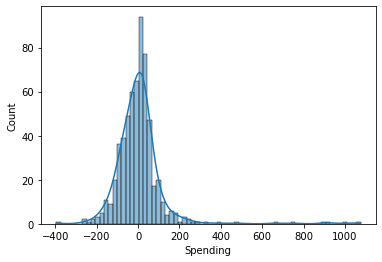

In [58]:
# 모델 잔차 계산
residuals = y_test - val_pred_y

# 잔차에 대한 히스토그램 생성
sns.histplot(residuals, kde=True)

# 정규분포를 따르는지 확인
print("Residuals are normally distributed:", stats.normaltest(residuals)[1] > 0.05)